In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

# project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
# sys.path.append(project_root)

# from Resources.Model import Model_v8, Model_v25, Model_v27, Model_v28
# from Resources.Game import *


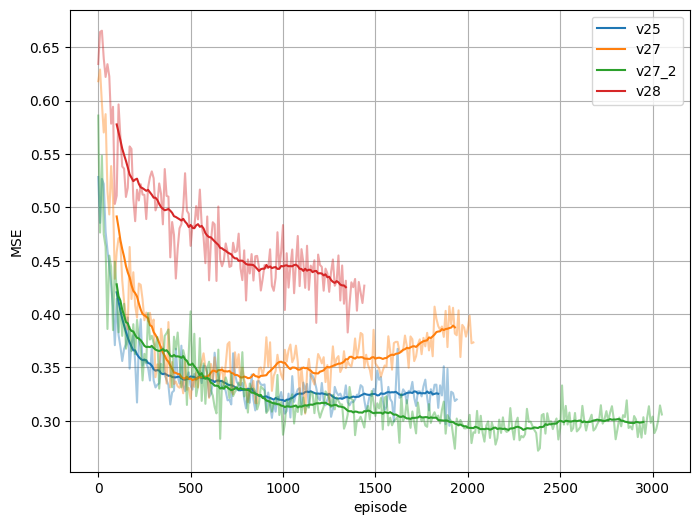

In [52]:
models_val = ['v25', 'v27', 'v27_2', 'v28']
error_histories = []
for model in models_val:
    if model == 'v28': # for last few steps learning parameters were changed manually (did not work well)
        error_histories.append(torch.load('validation_errors_'+model)[:-5])
    else:
        error_histories.append(torch.load('validation_errors_'+model))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
half_av_window = 10
plt.figure(figsize=(8, 6))
for h, hist in enumerate(error_histories):
    plt.plot([i* 10 for i in range(len(hist))], hist, alpha=0.4, color=colors[h])
    plt.plot([i* 10 for i in range(half_av_window, len(hist) - half_av_window)], 
             [np.mean(hist[i:i+2*half_av_window]) for i in range(0, len(hist)-2*half_av_window)], 
             alpha=1, color=colors[h], label=models_val[h])
plt.legend()
plt.grid()
plt.xlabel('episode')
plt.ylabel('MSE')

plt.savefig('validation error comparison for versions')
plt.show()


# half_av_window_std = 50
# plt.figure(figsize=(8, 6))
# for h, hist in enumerate(error_histories):
#     # plt.plot([i* 10 for i in range(len(hist))], hist, alpha=0.4, color=colors[h])
#     plt.plot([i* 10 for i in range(half_av_window_std, len(hist) - half_av_window_std)], 
#              [np.std(hist[i:i+2*half_av_window_std]) for i in range(0, len(hist)-2*half_av_window_std)], 
#              alpha=1, color=colors[h], label=models_val[h])
# plt.legend()
# plt.grid()
# plt.xlabel('episode')
# plt.ylabel('rolling std of MSE squence')
# plt.xlim([0, 3100])
# plt.show()